In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import os

os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
import torch
import matplotlib.pyplot as plt

from orthogonal_dfa.l_star.examples.bernoulli_parity import BernoulliParityOracle
from orthogonal_dfa.l_star.structures import DecisionTreeLeafNode
from orthogonal_dfa.l_star.sampler import UniformSampler
from orthogonal_dfa.l_star.decision_tree_to_dfa import *
from orthogonal_dfa.utils.pdfa import batched_iterated_matrix_multiply

In [4]:
oracle = BernoulliParityOracle(0.65, 0, modulo=7, allowed_moduluses=(2, 5))

In [5]:
us = UniformSampler(40)

In [6]:
pst = PrefixSuffixTracker.create(
    us,
    np.random.default_rng(0),
    oracle,
    alphabet_size=2,
    num_prefixes=6000,
    suffix_family_size=200,
    chi_squared_p_min=0.01,
    evidence_thresh=0.55,
    suffix_prevalence=0.05,
)
dt = pst.extract_decision_tree()

Expanding: there are 1 states to expand and 0 completed states


Sampling initial suffixes:   4%|4         | 8/200 [00:01<00:25,  7.55it/s]

Completing suffix family:   2%|1         | 3/177 [00:01<01:09,  2.49it/s]

Expanding: there are 2 states to expand and 0 completed states
Expanding mask with 4278 prefixes
Expanding: there are 3 states to expand and 0 completed states
Expanding mask with 2539 prefixes


Completing suffix family:   8%|7         | 4/52 [00:01<00:12,  3.89it/s]

Expanding: there are 4 states to expand and 0 completed states
Expanding mask with 1696 prefixes
Expanding: there are 5 states to expand and 0 completed states
Expanding mask with 848 prefixes
Expanding: there are 4 states to expand and 1 completed states
Expanding mask with 848 prefixes
Expanding: there are 3 states to expand and 2 completed states
Expanding mask with 826 prefixes
Expanding: there are 2 states to expand and 3 completed states
Expanding mask with 1737 prefixes
Expanding: there are 3 states to expand and 3 completed states
Expanding mask with 898 prefixes
Expanding: there are 2 states to expand and 4 completed states
Expanding mask with 837 prefixes
Expanding: there are 1 states to expand and 5 completed states
Expanding mask with 1691 prefixes
Expanding: there are 2 states to expand and 5 completed states
Expanding mask with 890 prefixes
Expanding: there are 1 states to expand and 6 completed states
Expanding mask with 799 prefixes


[[[1.         0.         0.         0.         0.         0.
   0.        ]
  [0.01       0.01       0.01       1.         0.01       0.01
   0.01      ]]

 [[0.03883495 1.         0.03883495 0.03883495 0.03883495 0.03883495
   0.03883495]
  [0.         0.         0.         0.         0.         1.
   0.        ]]

 [[0.01818182 0.01818182 1.         0.01818182 0.01818182 0.01818182
   0.01818182]
  [0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
   1.        ]]

 [[0.         0.         0.         1.         0.         0.
   0.        ]
  [0.00900901 0.00900901 1.         0.00900901 0.00900901 0.00900901
   0.00900901]]

 [[0.00900901 0.00900901 0.00900901 0.00900901 1.         0.00900901
   0.00900901]
  [0.02702703 1.         0.02702703 0.02702703 0.02702703 0.02702703
   0.02702703]]

 [[0.         0.         0.         0.         0.         1.
   0.        ]
  [1.         0.00854701 0.00854701 0.00854701 0.00854701 0.00854701
   0.00854701]]

 [[0.02362205 0.02

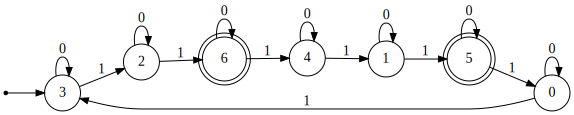

In [9]:
decision_tree_to_dfa(
    alphabet_size=2,
    dt=dt,
    oracle=oracle,
    sampler=us,
    min_samples_per_state=100,
    seed=0,
)